In [516]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")
from fractions import Fraction

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error

##### L'objectif de ce projet est de construire un modèle de regression qui permet de predire le prix de vente de voiture en fonction de ses caractèristiiques

In [517]:
#pd.read_csv("E:/DSTI/Cours/Machine_Learning_Python_Lab/ML_Livre_JA/imports-85.data")

file_path = "E:/DSTI/Cours/Machine_Learning_Python_Lab/ML_Livre_JA/imports-85.data"

In [518]:
# Lecture du fichier CSV
df = pd.read_csv(file_path, header=None)

In [519]:
# Affichage des premières lignes du DataFrame pour vérifier que les données ont été lues correctement
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [520]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


Les noms de colonnes ne sont pas définis dans ce jeux de données. Nous avons trouvé dans un autre fichier.

In [521]:
# les entêtes de colonnes sont des chiffres.
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25],
      dtype='int64')

In [522]:
#Noms des colonnes
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style","drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower","peak-rpm", "city-mpg", "highway-mpg", "price"]

In [523]:
headers

['symboling',
 'normalized-losses',
 'make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-type',
 'num-of-cylinders',
 'engine-size',
 'fuel-system',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'price']

In [524]:
#Relecture des données
# Nous voulons leurs attribué des nom des ent^tes
df = pd.read_csv(file_path, header=None, names = headers)

In [525]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Il est très important de connaitre les sens de chaque variable dans un jeux de données.

#### Data cleanning

Gestion de valeurs manquantes

Il ya de valeurs manquantes representé par ?. Comment gérer ces données manquantes

In [527]:
# Remplacement de ? par NAN
# inplace=True; elle permet de modifier directement depuis le dataFrame
df.replace("?", np.nan, inplace=True)

In [528]:
df.shape
# 205 lignes et 26 colonnes

(205, 26)

In [529]:
# Evaluation de nombre de valeurs manquantes par colonnes
df.isna().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [530]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

D'après la description du jeu de données, les variables normalized-losses, bore, stroke, horsepower et peak-rpm sont des variables continues. Nous remplacerons donc les valeurs manquantes de chacune de ces colonnes par la moyenne de la colonne. 

La variable num-of-doors est une variable catégorielle donc nous allons remplacer ses deux valeurs manquantes par le mode de la colonne.
La variable price est notre variable cible donc nous allons tout simplement supprimer les valeurs manquantes de cette colonne !

In [531]:
# imputation par la moyenne des colonnes normalized 
# losses
# bore
# stroke
# horsepower
# peak_rpm

def imput_avg(x):
    avg = x.astype("float").mean(axis = 0)  # ligne; Elle convertit d'abord les valeurs de la série en type "float" en utilisant astype("float")
    return x.replace(np.nan, avg, inplace = True)
for k in ["normalized-losses", "bore", "stroke", "horsepower", "peak-rpm"]:
     imput_avg(df[k])


In [532]:
# imputation par le mode de la variable num-of_doors

mode = df["num-of-doors"].value_counts().idxmax() # found index maximium
df["num-of-doors"].replace(np.nan, mode, inplace = True)

In [533]:
# suppresion de ligne df où il ya des données manquantes dans la variables price
df.dropna(subset=["price"], axis = 0, inplace = True)

Après avoir supprimer des lignes dans DataFrame toujours, il faut réinatialiser les indices

In [534]:
# Reinitialiser les indices
df.reset_index(drop = True, inplace = True)

In [535]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

#### Format incorrect de données

In [536]:
# Format des données 
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

On remarque que certaines variables ne sont pas stockées dans le bon format. Par exemple, il y a des variables de type numérique comme bore et stroke qui sont stockées dans le format'object' (format des chaînes de caractères). 

En se basant sur la description & des données, nous allons convertir les types de données dans le format approprié pour chaque colonne. 
Comme vous pouvez voirn ci-dessous.

In [537]:
df["bore"].value_counts()

bore
3.62                  23
3.19                  20
3.15                  15
2.97                  12
3.03                  10
3.46                   9
3.31                   8
3.78                   8
3.43                   8
3.27                   7
2.91                   7
3.39                   6
3.54                   6
3.05                   6
3.58                   6
3.70                   5
3.01                   5
3.35                   4
3.3297512437810943     4
3.17                   3
3.59                   3
3.74                   3
3.47                   2
3.24                   2
3.63                   2
3.50                   2
3.80                   2
3.33                   2
3.94                   1
3.13                   1
2.54                   1
3.08                   1
3.61                   1
3.34                   1
3.60                   1
2.92                   1
3.76                   1
2.68                   1
2.99                   1
Name: count, dtype: 

In [538]:
df["stroke"].value_counts()

stroke
3.40                 19
3.23                 14
3.15                 14
3.03                 14
3.39                 13
2.64                 11
3.29                  9
3.35                  9
3.46                  8
3.27                  6
3.19                  6
3.41                  6
3.07                  6
3.58                  6
3.50                  6
3.64                  5
3.52                  5
3.86                  4
3.54                  4
3.47                  4
3.255422885572139     4
3.90                  3
3.11                  3
2.90                  3
3.10                  2
4.17                  2
2.80                  2
2.19                  2
3.08                  2
2.68                  2
2.36                  1
3.16                  1
2.07                  1
3.21                  1
3.12                  1
2.76                  1
2.87                  1
Name: count, dtype: int64

In [539]:
# Conversion des données
df[["bore", "stroke", "peak-rpm", "price"]] = df[["bore", "stroke", "peak-rpm", "price"]].astype("float")

df[["normalized-losses", "horsepower"]] = df[["normalized-losses", "horsepower"]].astype("int")

In [540]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

#### Sauvegarde des données nettoyées

Avant de passer à l'analyse exploratoire de données, nous sauvegardons le fichier de données issu de cette étape de nettoyage

In [541]:
df.to_csv("df_claen.csv")

#### ANALYSE EXPLORATOIRE DES DONNEES

Le but de cette partie est de mieux comprendre les données en tirant des informations à partir de ces données. Principalement, nous voulons déterminer les variables qui influencent le prix d'une voiture.

###### CORRELATION

Nous voulons mesurer la force des relations linéaires entre variables. Pour ce faire, nous calculerons le coefficient de corrélation de Pearson et nous afficherons les résultats.

In [542]:
#corr_matrix = df.corr()

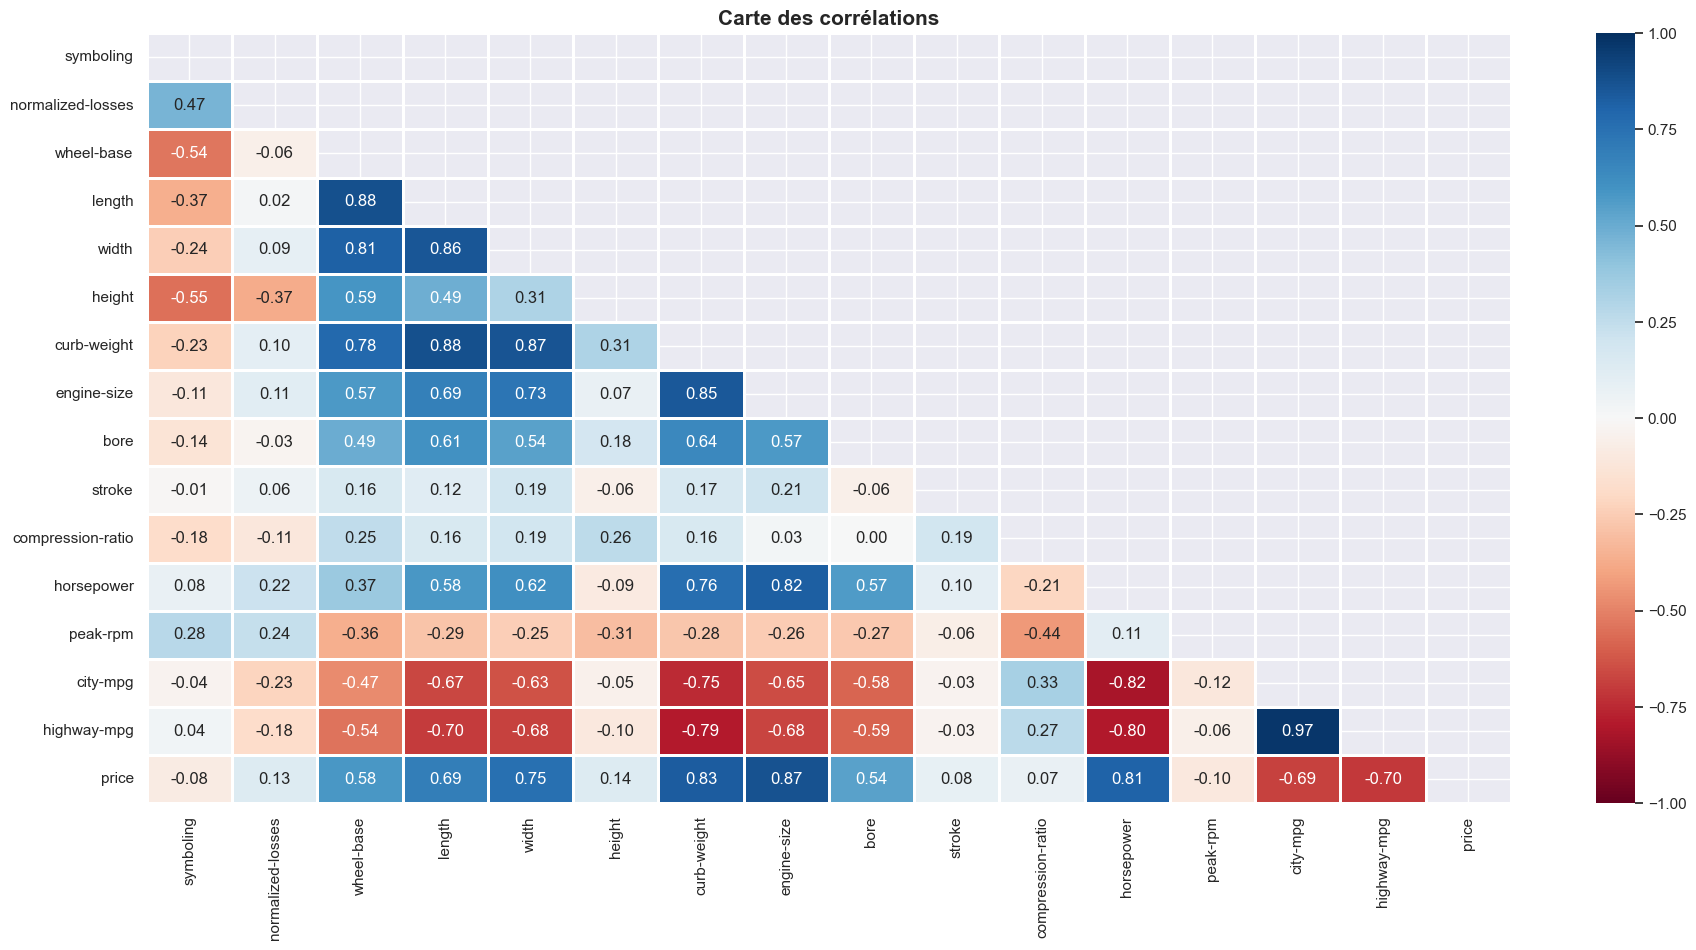

In [543]:
# Sélectionner uniquement les colonnes numériques
df_numeric = df.select_dtypes(include=[np.number])

# Définir la taille de la figure pour les graphiques Seaborn
sns.set(rc={'figure.figsize': (22, 10)})

# Calculer la matrice de corrélation
corr_matrix = df_numeric.corr()

# Créer un masque pour la partie supérieure de la matrice de corrélation
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Créer une heatmap de la matrice de corrélation avec le masque
sns.heatmap(corr_matrix, mask=mask, center=0, cmap='RdBu', linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)

# Ajouter un titre à la heatmap
plt.title('Carte des corrélations', fontsize=15, fontweight='bold')

# Afficher la heatmap
plt.show()

En examinant les coefficients de corrélation, nous détectons les potentiels prédicteurs du prix d'une voiture. Pour chaque variable numérique potentiellement prédicteur du prix, nous ferons une régression linéaire simple entre elle et la variable price, afficher le coefficient de corrélation de Pearson et ainsi que sa p-valeur.

Le but de la régression linéaire est d'ajuster une droite aux données. Une droite, en 02 dimensions, est représentée par l'équation : y = ax + b. y est la variable dépendante (encore appelée variable d'intérêt ou variable cible) et x est la variable indépendante (encore appelée prédicteur). a et b sont les paramètres du modèle (a est la pente de la droite d'ajustement et b est l'ordonnée à l'origine) que nous voulons apprendre.


Commençons d'abord par définir une fonction qui automatise cette tâche afin de ne pas copier-coller du code.

In [544]:
# Définir une fonction slrViz_corr
def slrViz_corr(var):
    sns.regplot(x = var, y = df["price"])
    plt.ylim(0,)
    Pearson_coef, P_value = stats.pearsonr(var, df["price"])
    return print("Le coefficient de correlation de Pearson est", Pearson_coef, "avec une P_valeurde", P_value)

wheel_base VS price

La variable wheel_base VS price représente la distance entre les essieux avant et arrière d'une voiture.

Le coefficient de correlation de Pearson est 0.584641822265508 avec une P_valeurde 8.076488270732885e-20


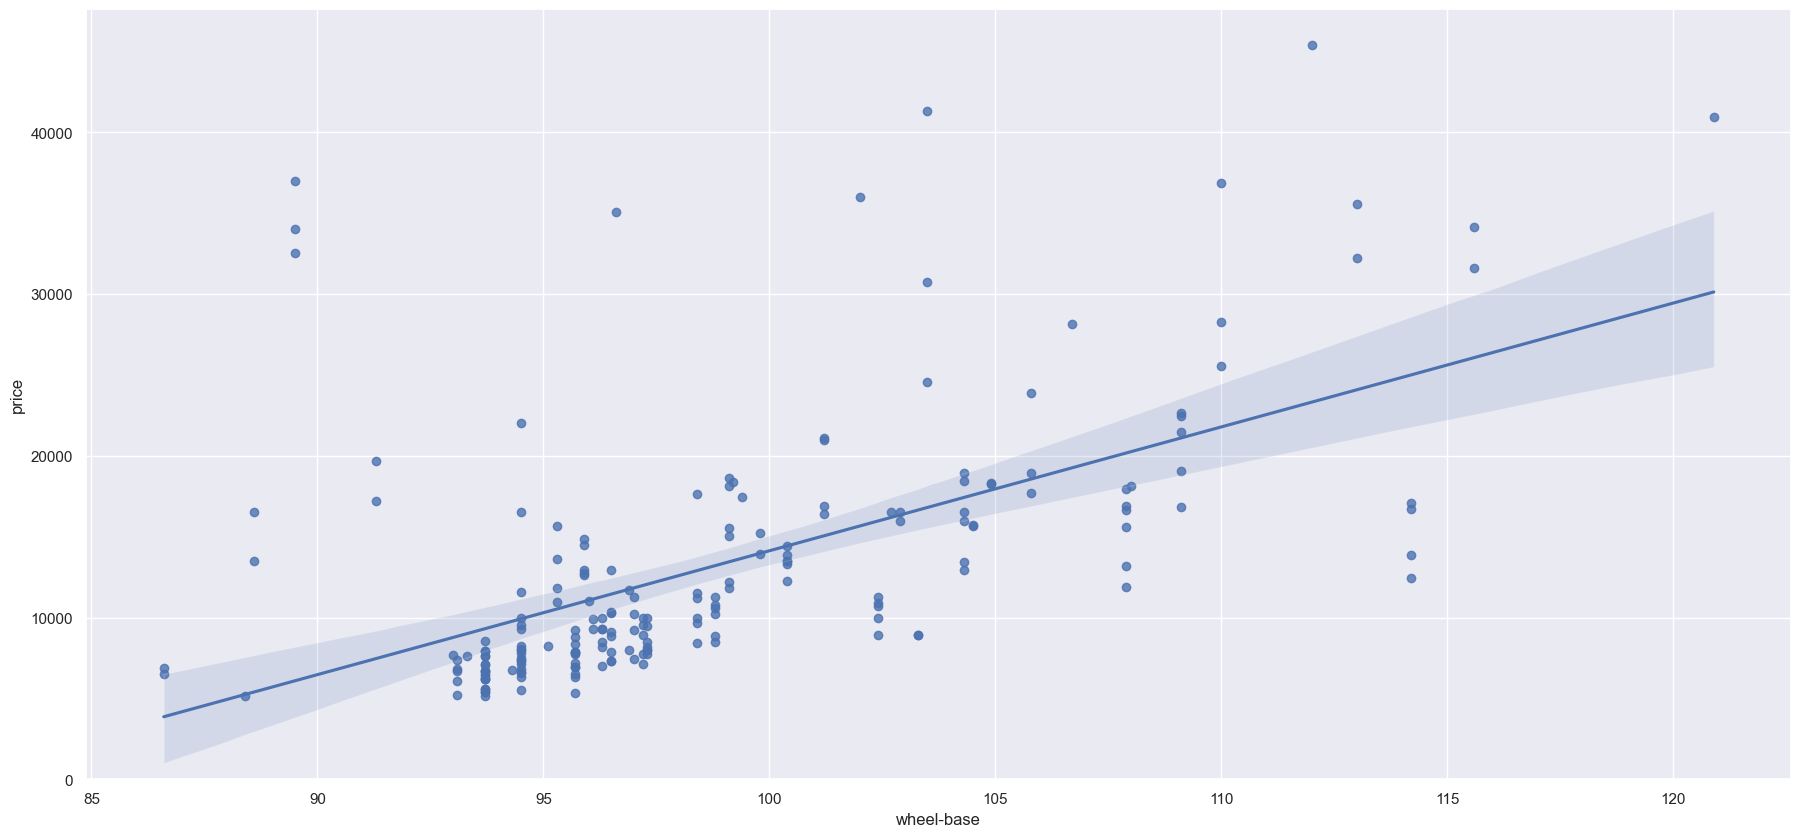

In [545]:
# wheel_base VS price
slrViz_corr(df["wheel-base"])

La corrélation entre les variables wheel-base et price est statistiquement significative (p-value inférieure à 0,001) bien que la relation linéaire ne soit pas très forte.


Dans le contexte de la régression linéaire, la ligne droite et les points sur le graphique ont des significations spécifiques :

### Ligne droite

La ligne droite sur le graphique est appelée **ligne de régression**. Cette ligne représente la meilleure approximation linéaire de la relation entre la variable indépendante (dans ce cas, `var` ou `df["wheel-base"]`) et la variable dépendante (`df["price"]`). La ligne de régression est déterminée par l'équation de la droite \( y = ax + b \), où :
- \( y \) est la variable dépendante (le prix dans ce cas),
- \( x \) est la variable indépendante (l'empattement des roues dans ce cas),
- \( a \) est la pente de la ligne de régression,
- \( b \) est l'ordonnée à l'origine (intercept).

La pente \( a \) indique le changement moyen de la variable dépendante pour un changement d'une unité dans la variable indépendante. L'ordonnée à l'origine \( b \) est la valeur de \( y \) lorsque \( x \) est zéro.

### Points

Les points sur le graphique représentent les **données réelles** ou **observées**. Chaque point correspond à une paire de valeurs observées pour les variables indépendantes et dépendantes :
- La coordonnée horizontale (x) de chaque point représente la valeur de la variable indépendante (`df["wheel-base"]`).
- La coordonnée verticale (y) de chaque point représente la valeur de la variable dépendante (`df["price"]`).

### Explication du code

Le code que vous avez fourni utilise `seaborn` pour tracer le graphique de régression et `scipy.stats` pour calculer le coefficient de corrélation de Pearson et la p-value.

```python
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def slrViz_corr(var):
    sns.regplot(x=var, y=df["price"])
    plt.ylim(0,)
    Pearson_coef, P_value = stats.pearsonr(var, df["price"])
    return print("Le coefficient de correlation de Pearson est", Pearson_coef, "avec une P_valeur de", P_value)

slrViz_corr(df["wheel-base"])
```

### Interprétation

1. **Ligne droite (ligne de régression)** :
   - Représente la meilleure estimation de la relation linéaire entre `wheel-base` et `price`.

2. **Points (données réelles)** :
   - Chaque point représente une observation individuelle de `wheel-base` et `price`.

3. **Coefficient de corrélation de Pearson** :
   - Mesure la force et la direction de la relation linéaire entre deux variables.
   - Une valeur proche de +1 ou -1 indique une relation linéaire forte.
   - Une valeur proche de 0 indique une faible relation linéaire.

4. **P-value** :
   - Indique la probabilité que la corrélation observée soit due au hasard.
   - Une p-value faible (généralement < 0.05) indique que la corrélation est statistiquement significative.

### Exemple de sortie

Si la fonction retourne un coefficient de corrélation de Pearson de 0.75 avec une p-value de 0.001, cela signifie :
- Il y a une forte relation positive entre `wheel-base` et `price`.
- La relation est statistiquement significative, donc peu probable due au hasard.

### Conclusion

La ligne de régression montre la tendance générale de comment `price` change avec `wheel-base`, tandis que les points montrent les valeurs réelles observées dans votre jeu de données. Le coefficient de corrélation de Pearson quantifie la force de cette relation, et la p-value indique si cette relation est statistiquement significative.

#### explication davantage

par exemple. S'il existe une forte relation entre price et wheel-base. Qu'est-ce que cela veut dire?

Si une analyse de régression linéaire montre qu'il existe une forte relation entre le price (prix) et le wheel-base (empattement des roues) d'une voiture, cela signifie plusieurs choses :

Interprétation d'une forte relation


Corrélation positive :

Si le coefficient de corrélation de Pearson est proche de +1, cela indique qu'il y a une forte corrélation positive entre les deux variables.
Cela signifie qu'en général, à mesure que l'empattement des roues augmente, le prix de la voiture tend également à augmenter.

length VS price

Le coefficient de correlation de Pearson est 0.6906283804483642 avec une P_valeurde 8.016477466158868e-30


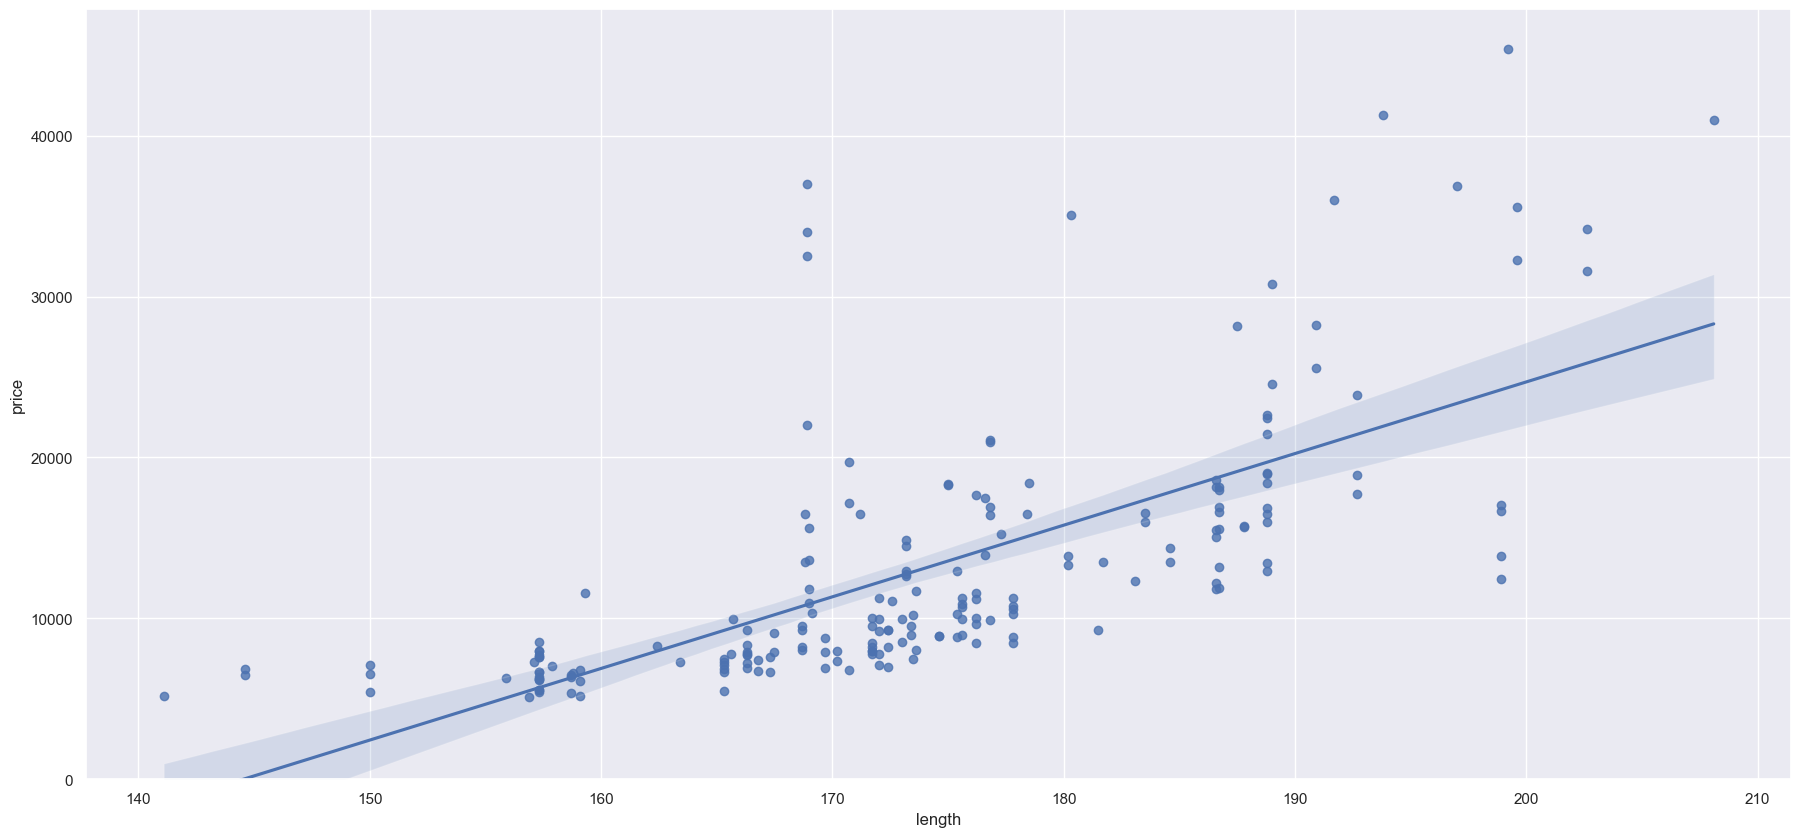

In [546]:
# wheel_base VS price
slrViz_corr(df["length"])

#### Signification de la P-Value

Une p-value très faible (près de zéro) indique qu'il est extrêmement improbable que la corrélation observée soit due au hasard.

Typiquement, une p-value inférieure à 0.05 est considérée comme statistiquement significative. Dans ce cas, la p-value est bien en dessous de ce seuil.  En résumé, une p-value de 8.016477466158868×10−30  indique que la probabilité que la corrélation de 0.6906 soit due au hasard est pratiquement nulle. Cela signifie que la corrélation observée est hautement statistiquement significative.

Il y a une forte corrélation positive et statistiquement significative (p-value inférieure à 0,001)
entre les variables length et Price

width VS price

Le coefficient de correlation de Pearson est 0.7512653440522672 avec une P_valeurde 9.20033551048206e-38


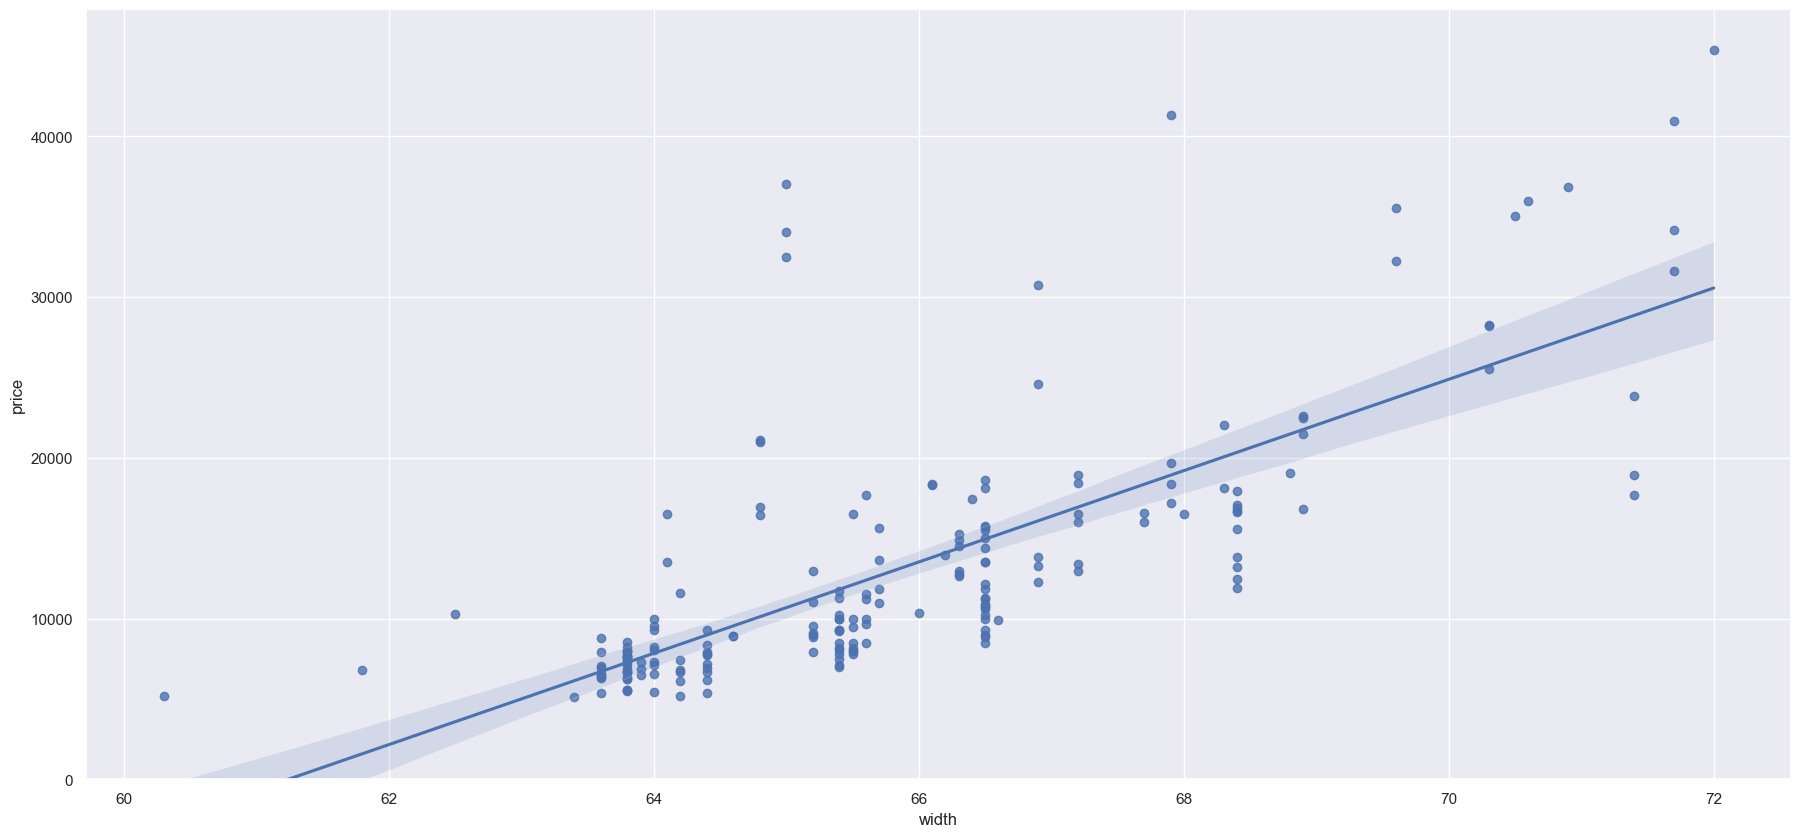

In [547]:
# wheel_base VS price
slrViz_corr(df["width"])

Il y a une forte corrélation positive et statistiquement significative (p-value inférieure à 0,001) entre les variables width et Price

curb-weight VS price

La variable curb_weight représente le poids à vide d'une voiture c'est à dire son poids sans occupants ni bagages

Le coefficient de correlation de Pearson est 0.8344145257702845 avec une P_valeurde 2.189577238893965e-53


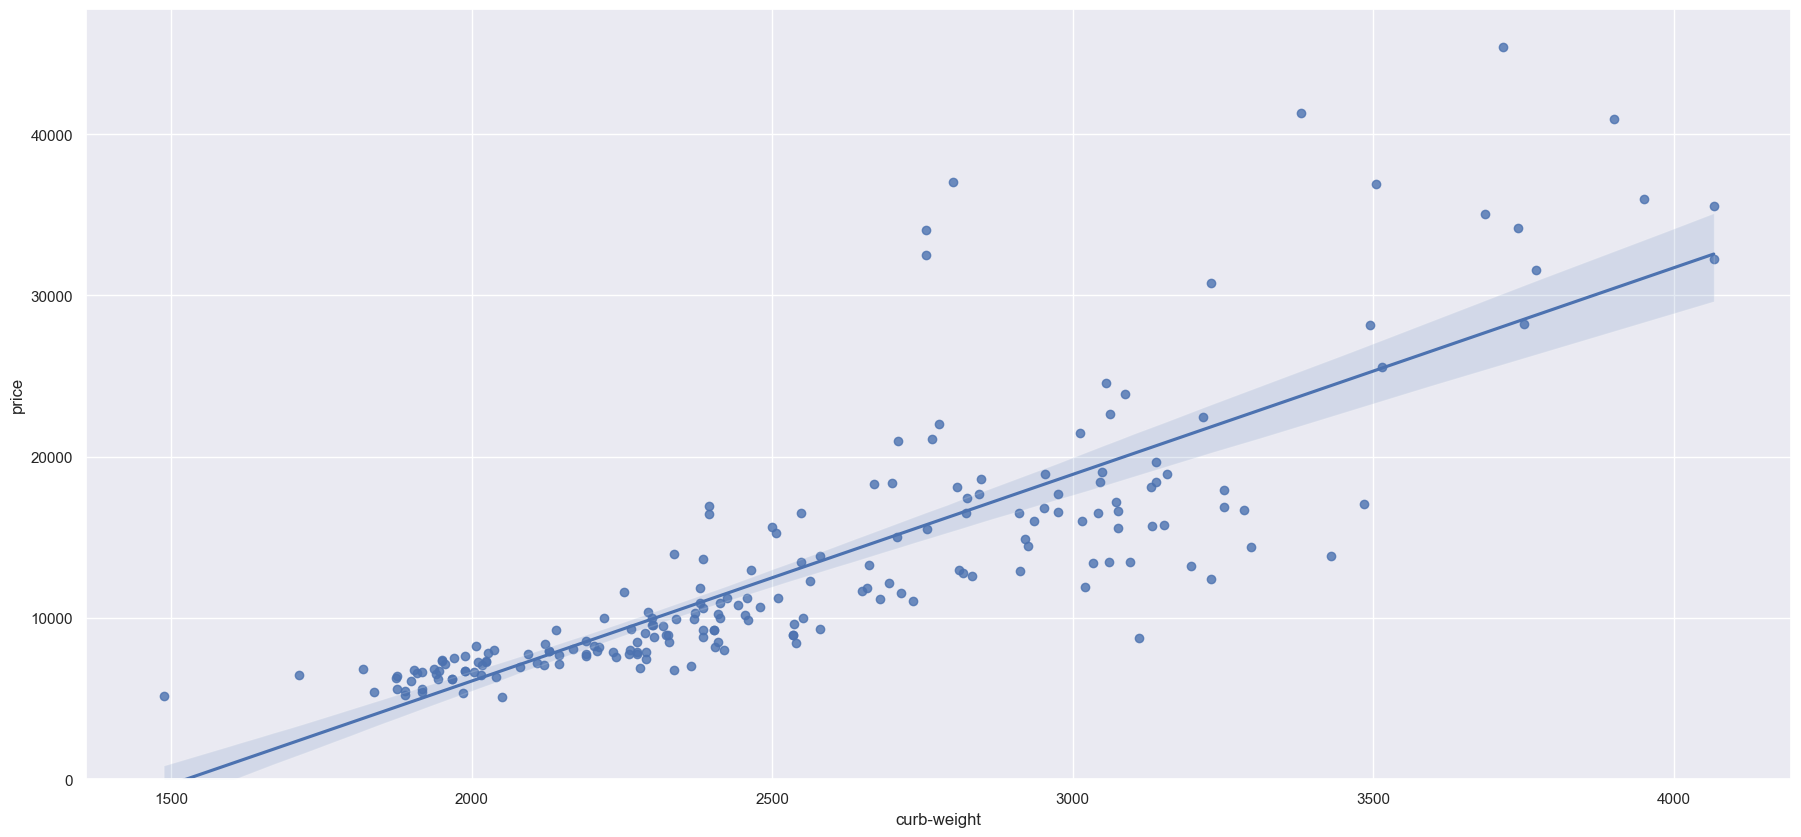

In [548]:
# Régression linéaire simple de "price" en fonction de "curb-weight"
slrViz_corr(df["curb-weight"])

Il y a une corrélation positive extrêmement forte et statistiquement significative (p-value inférieure à 0,001) entre les variables curb-weight et price.

curb-weight VS price

La variable engine-size représente la taille du moteur.

Le coefficient de correlation de Pearson est 0.8723351674455186 avec une P_valeurde 9.265491622197359e-64


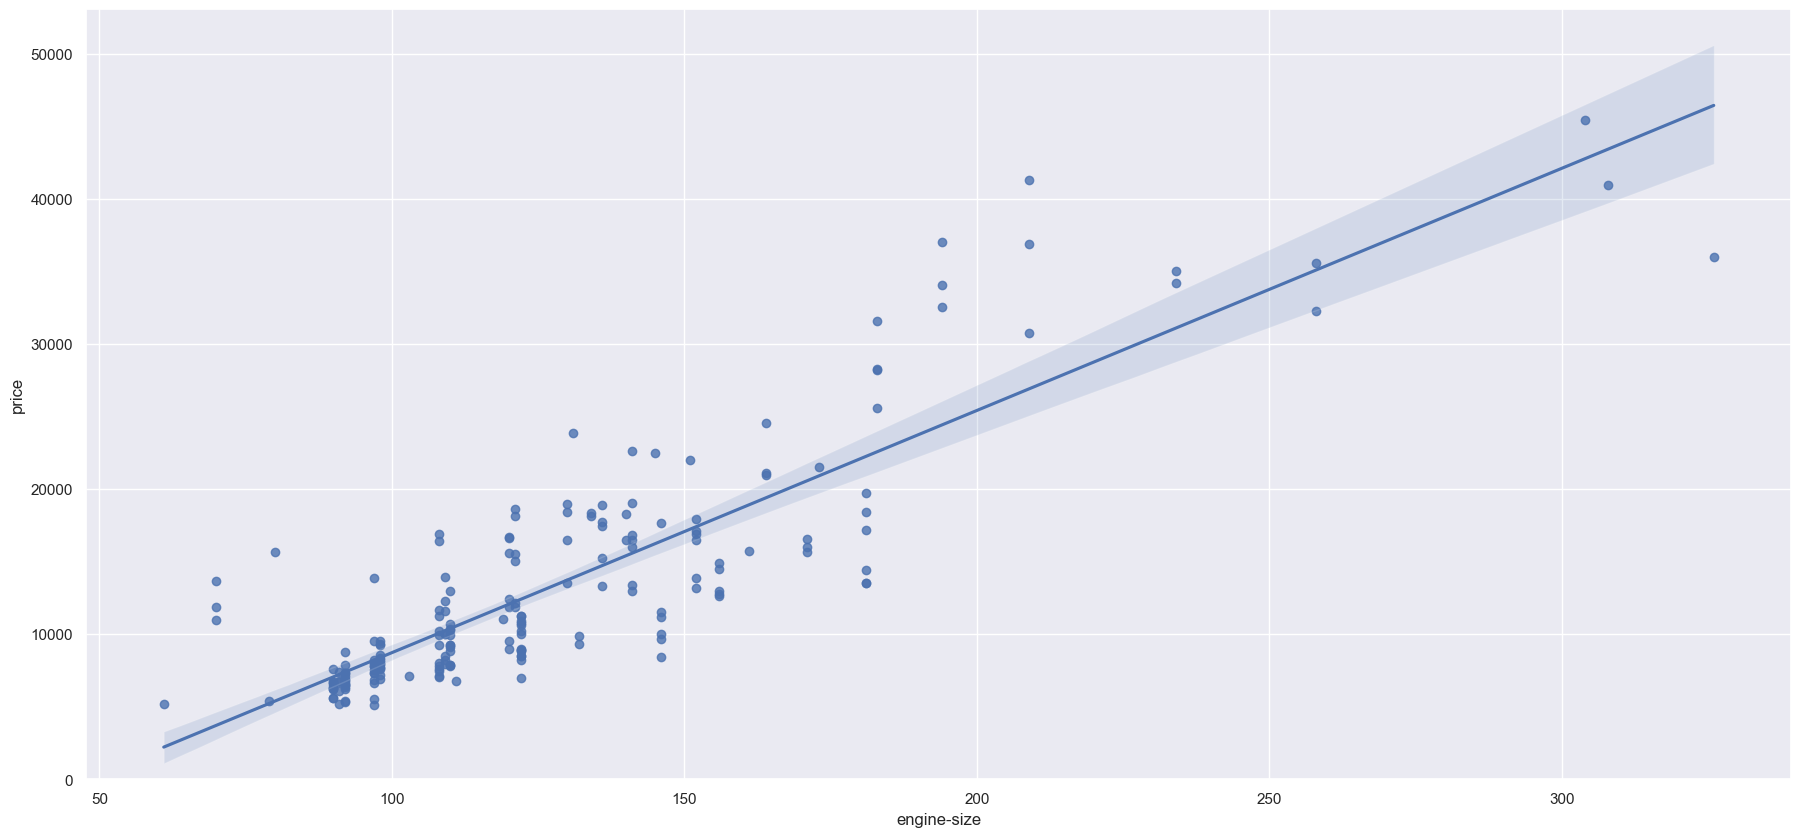

In [549]:
#Régression Linéaire simple de 'price' en fonction de 'engine-size'
slrViz_corr(df["engine-size"])

Il y a une corrélation positive extrêmement forte et statistiquement significative (p-value inférieure à 0,001) entre les variables engine-size et price.

bore VS price

La variable bore représente le diamètre du cylindre de la jante

Le coefficient de correlation de Pearson est 0.5431553832626603 avec une P_valeurde 8.049189483935315e-17


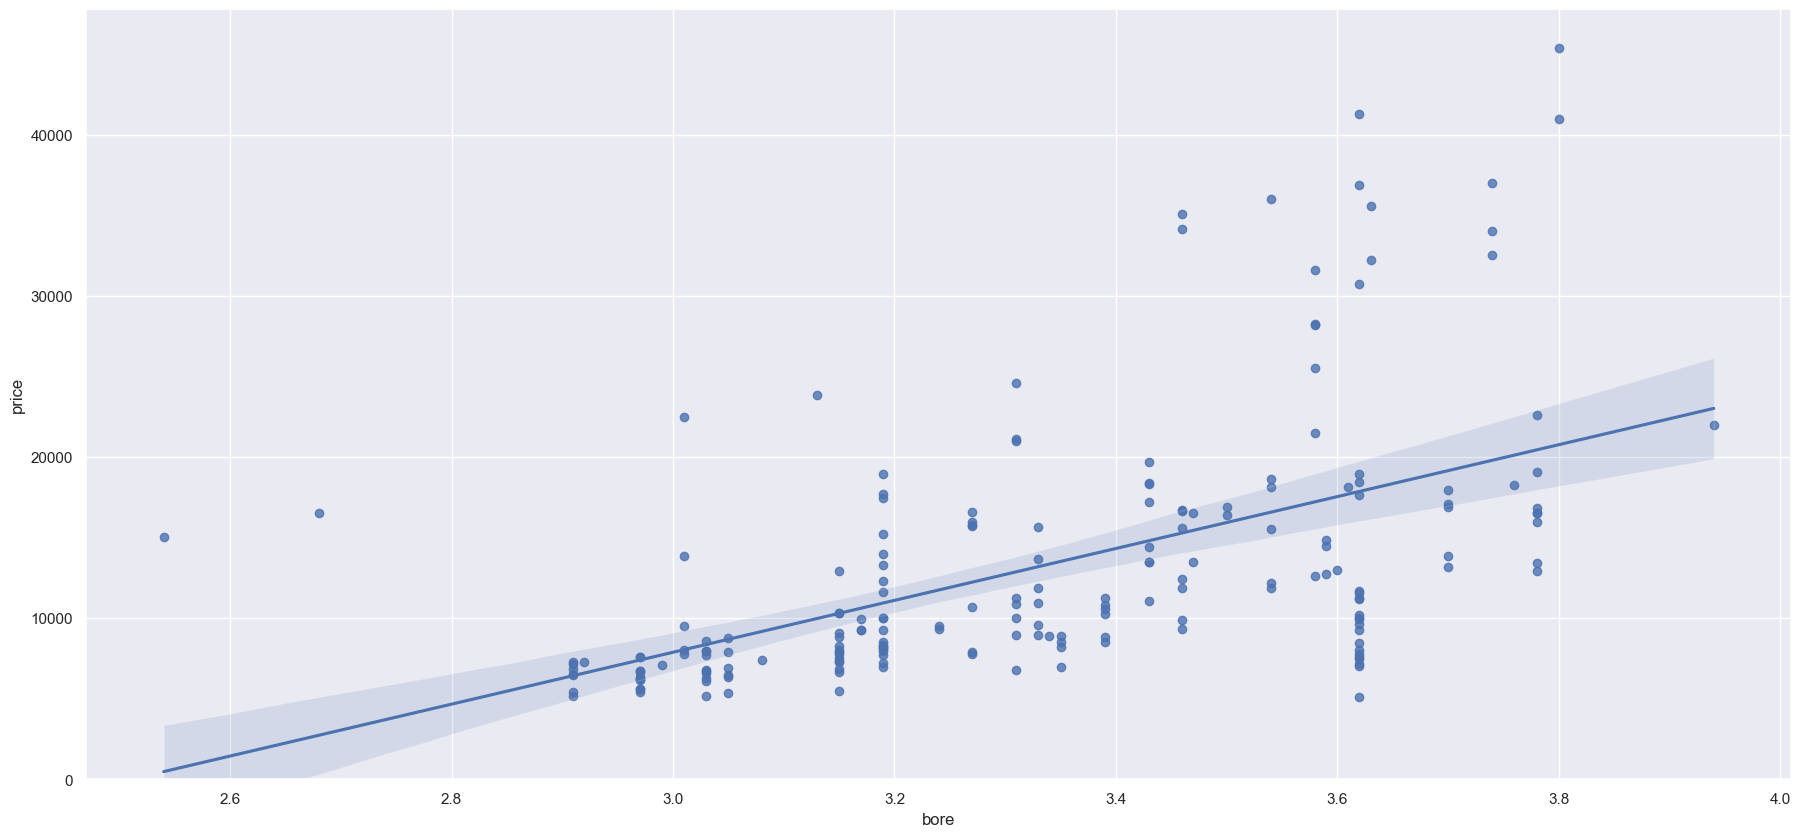

In [550]:
slrViz_corr(df["bore"])

La corrélation entre les variables bore et price est statistiquement significative (p-value inférieure à 0,001) bien que la relation linéaire ne soit pas très forte.
horsepower VS price
horsepower représente la puissance du moteur (une unité de puissance est égale à 745,7 watts).

Le coefficient de correlation de Pearson est 0.8096068016571054 avec une P_valeurde 6.273536270650351e-48


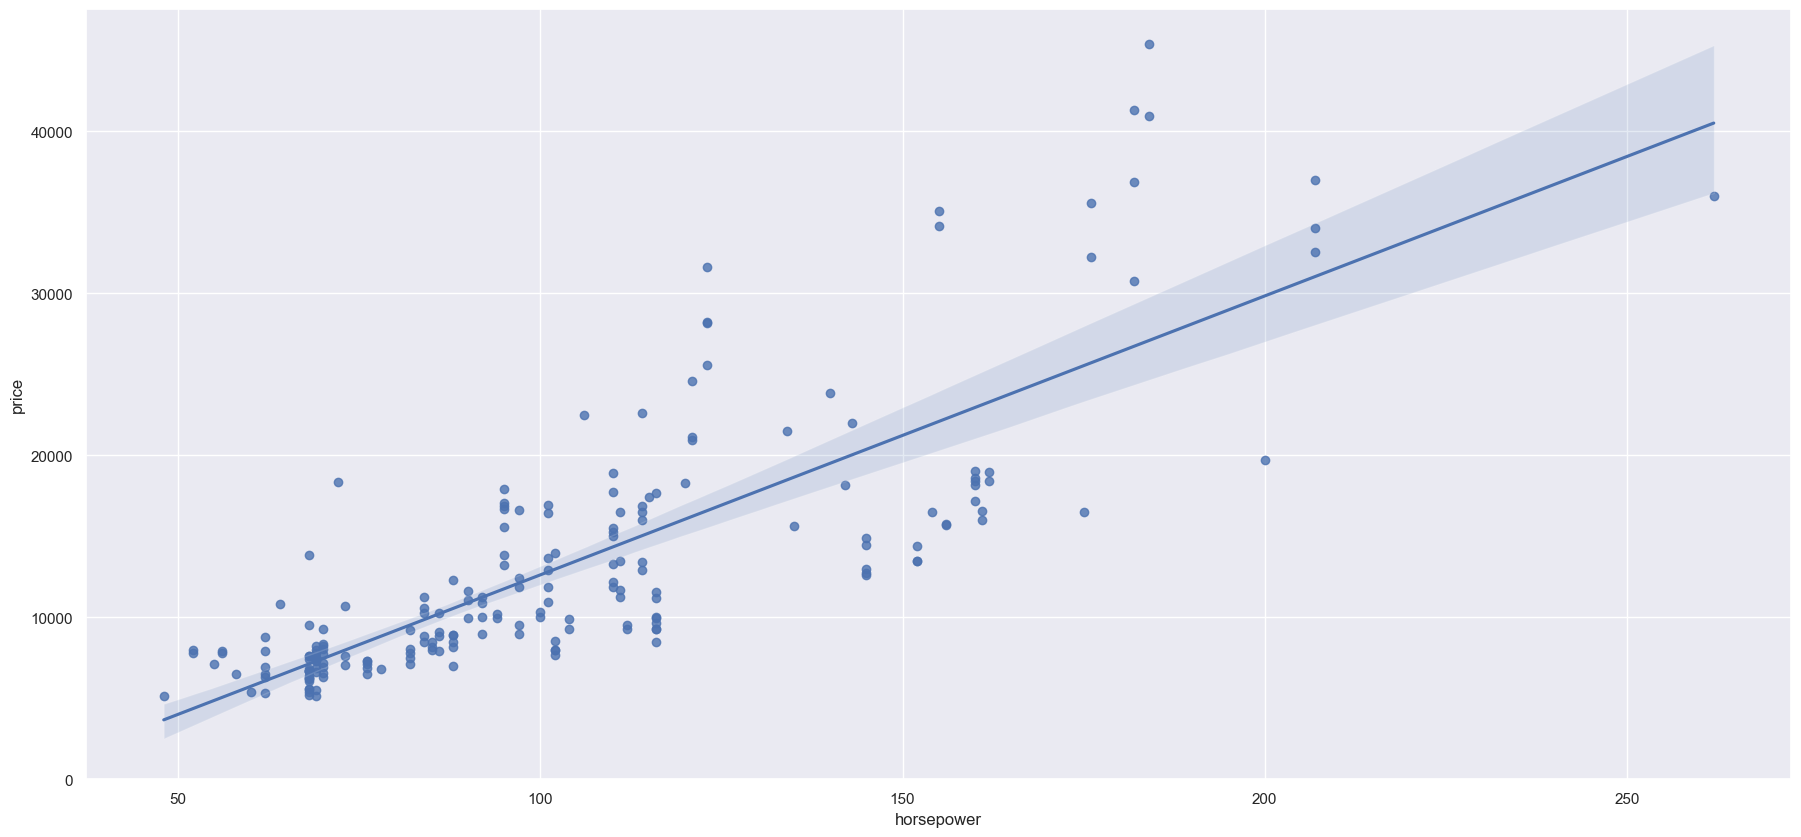

In [551]:
#Régression linéaire simple de 'price' en fonction de 'horsepower'
slrViz_corr(df["horsepower"])

Il y a une très forte corrélation positive et statistiquement significative (p-value inférieure à 0,001) entre la puissance du moteur et le prix de la voiture. Autrement dit, plus le moteur est puissant, plus le prix de la voiture est élevé.

city-mpg VS price

La variable citv-mpg représente la consommation en carburant de la voiture en agglomération.
Elle est donnée en miles par gallon. Pour trouver la consommation en Litres/100 Km, il faut diviser 235 par la consommation en miles/gallon).
mpg'

Le coefficient de correlation de Pearson est -0.6865710067844677 avec une P_valeurde 2.3211320655676474e-29


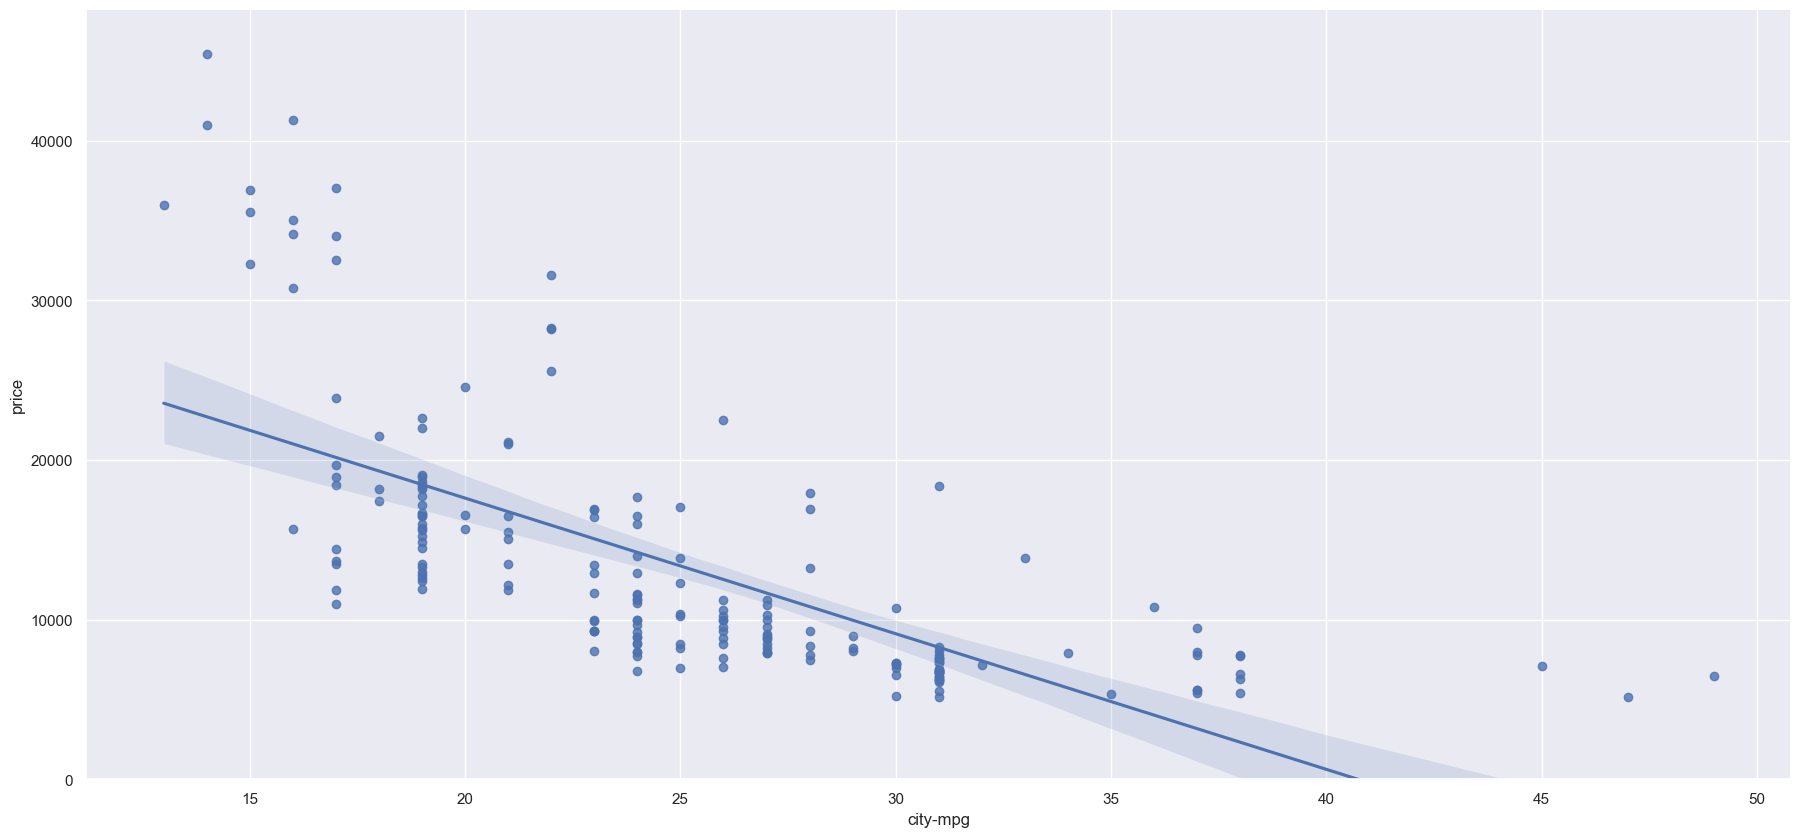

In [552]:
#Régression linéaire simple de 'price' en fonction de 'city-mpg'
slrViz_corr(df["city-mpg"])

Il y a une forte corrélation négative et statistiquement significative (p-value inférieure à 0,001) entre les variables city-mpg
et price. Autrement dit, plus la consommation en carburant (en ville) de la voiture est importante, plus sa valeur (prix) baisse.

highway-mpg VS price

Le coefficient de correlation de Pearson est -0.704692265058953 avec une P_valeurde 1.749547114447557e-31


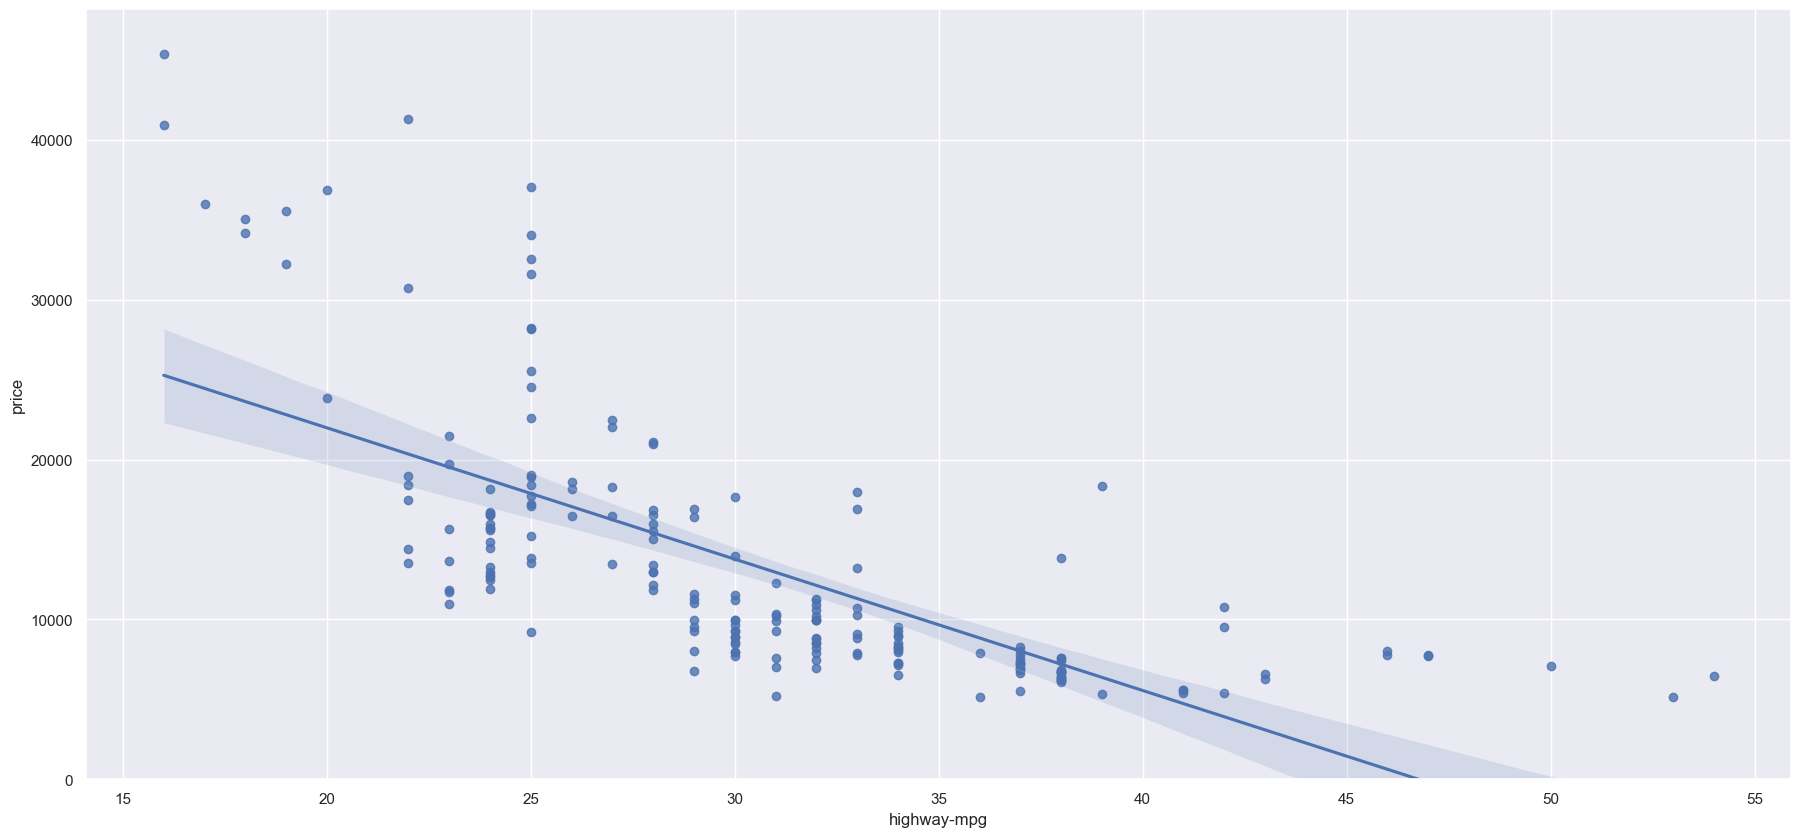

In [553]:
#Régression linéaire simple de 'price' en fonction de 'city-mpg'
slrViz_corr(df["highway-mpg"])

Il y a une très forte corrélation négative et statistiquement significative (p-value inférieure à 0,001) entre les variables highway-mpg et price. Autrement dit, plus la consommation en carburant (sur l'autoroute) de la voiture est importante, plus son prix baisse.
A travers les analyses ci-dessus, nous avons déterminé les variables numériques qui influencent le prix d'une voiture. 


Qu'en est-il de la relation entre chacune des valeurs catégorielles et la variable d'intérêt? Nous pouvons visualiser ces relations par des boîtes à moustaches.


* Variables catégorielles VS variable cible body-style et price

body-style et price

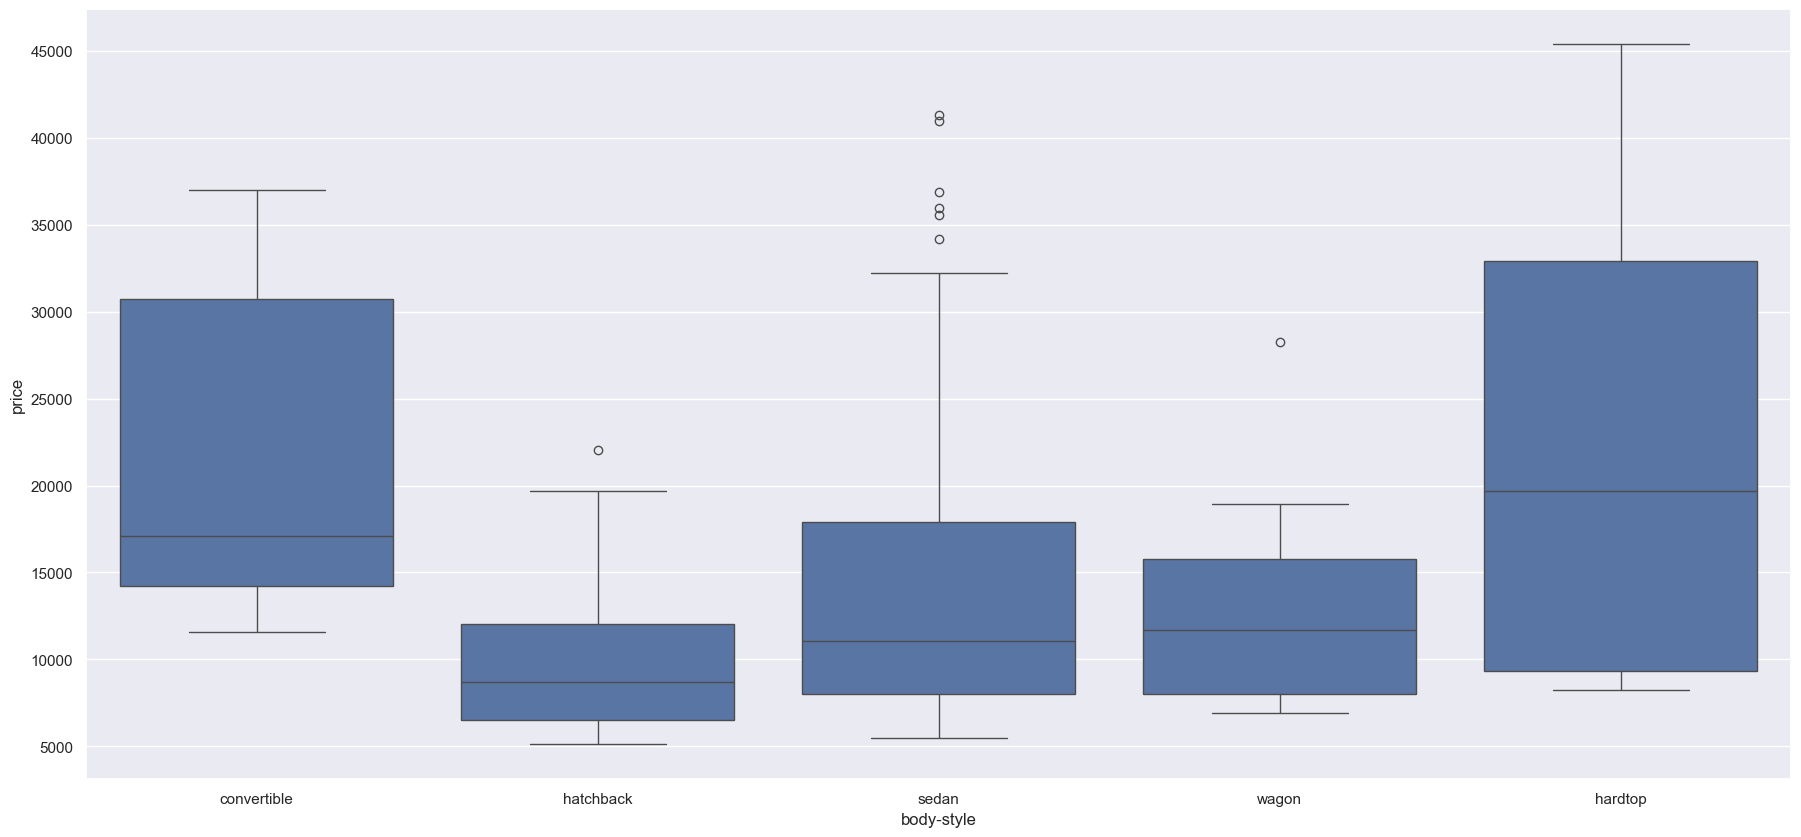

In [554]:
sns.boxplot(x = "body-style", 
            y = "price", 
            data = df)

plt.show()

Nous voyons que les distributions de prix entre les différentes catégories de body-style ont un chevauchement important, et donc cette variable ne serait pas un bon prédicteur de prix.

La variable engine-location représente l'emplacement (avant ou arrière) du moteur.

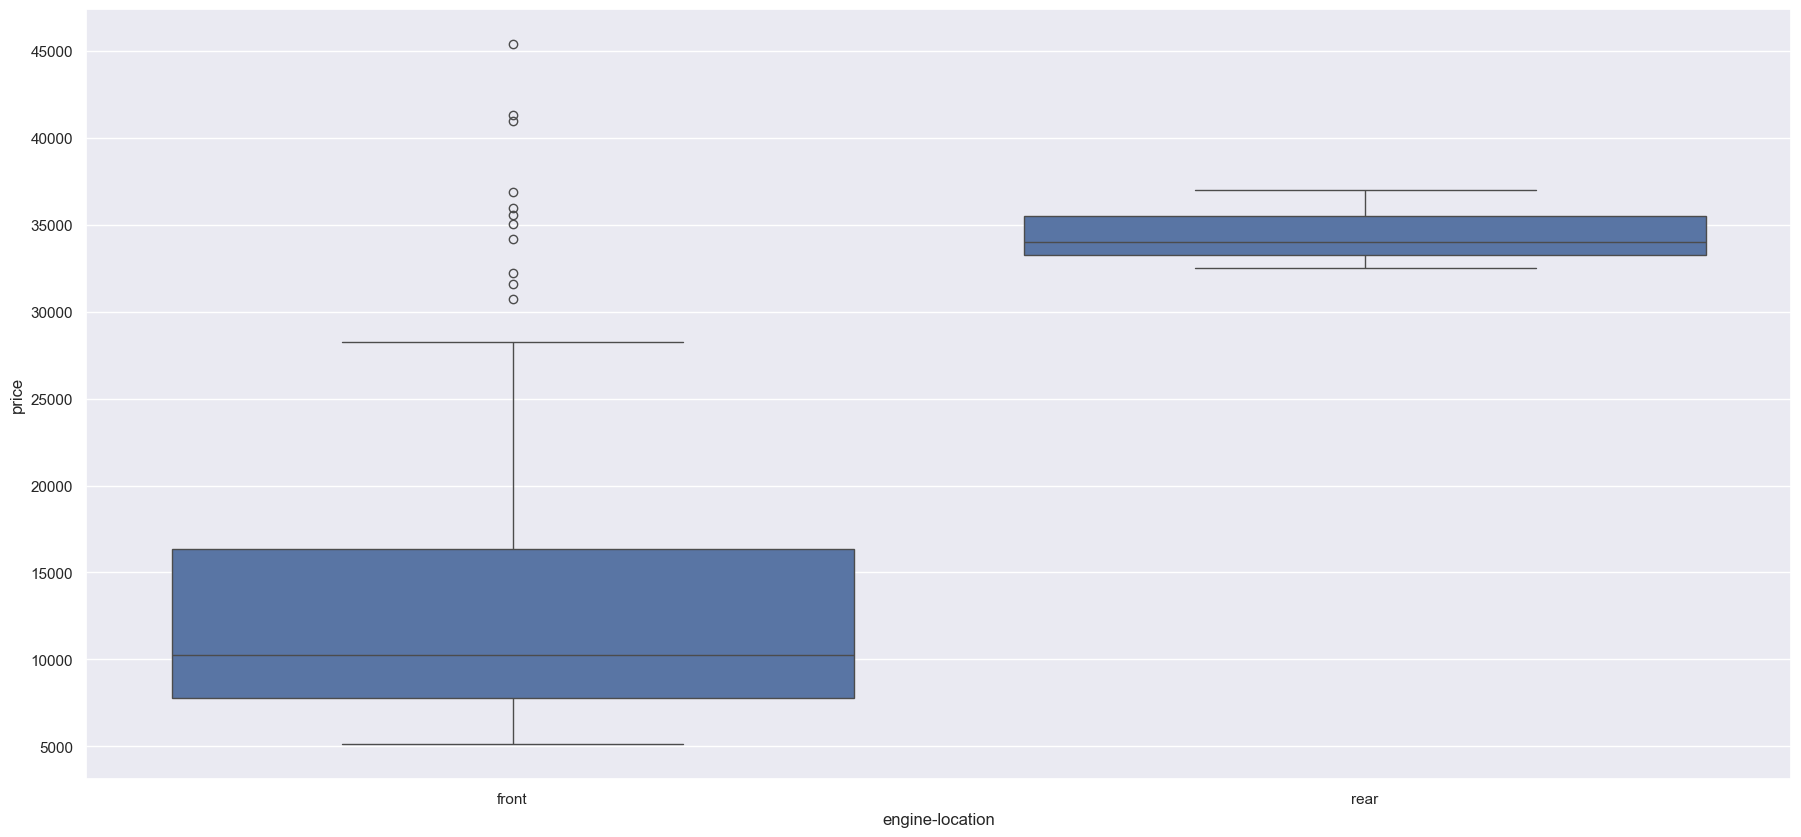

In [555]:
sns.boxplot(x = 'engine-location', 
            y = 'price', 
              data = df)
plt.show()

Les voitures avec des moteurs à l'arrière sont plus chères que les voitures avec des moteurs à l'avant. Par ailleurs, il y a seulement trois voitures qui ont un moteur à l'arrière. Ce problème de déséquilibre de classe disqualifie la variable engine-location comme variable prédicteur du prix.


In [556]:
df['engine-location'].value_counts()

engine-location
front    198
rear       3
Name: count, dtype: int64

drive-wheels VS price

La variable drive-wheels définit les roues motrices de la voiture.

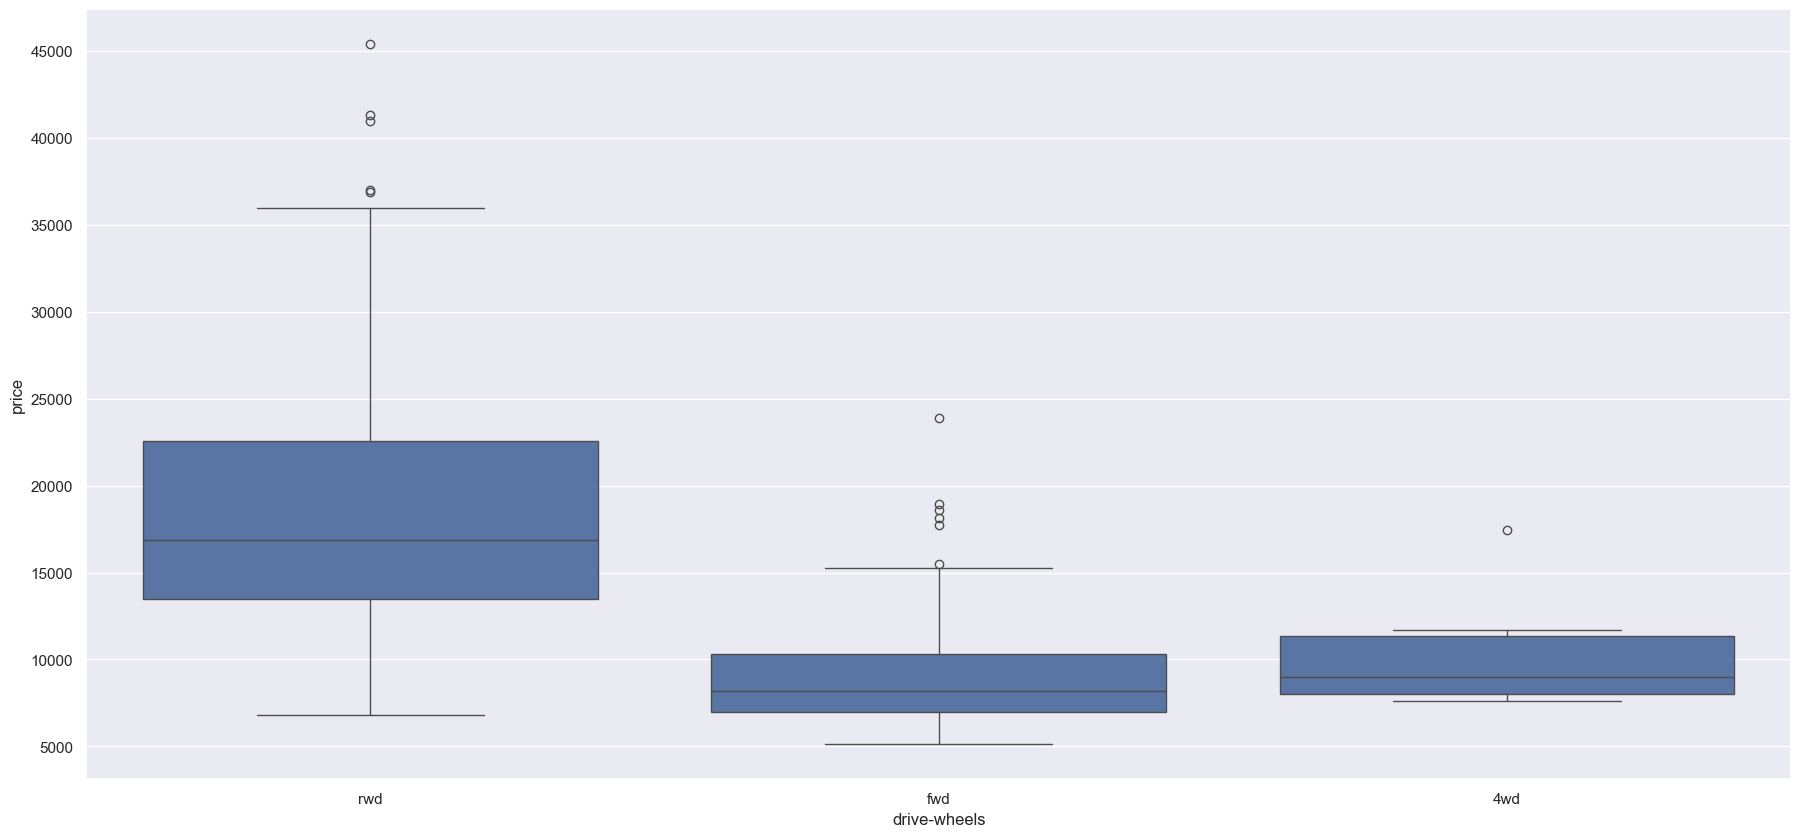

In [557]:
sns.boxplot(x = 'drive-wheels', 
            y = 'price', 
              data = df)
plt.show()

On voit ici que la répartition des prix entre les différentes catégories de roues motrices est différente. La variable drive-wheels pourrait potentiellement être une variable prédicteur de prix d'une voiture.
Cette analyse exploratoire des données nous a permis d'avoir une meilleure idée des variables qu'il est important de prendre en compte lors de la construction du modèle de prédiction du prix d'une voiture. Il s'agit des variables suivantes :
Variables numériques continues: 

#### ___________________________Le20/05/2024

Variable catégorielle : 'drive-wheels'.

#### MODELISATION DU PRIX D'UNE VOITURE

* CONSTRUCTION DU MODELE

Nous construirons un modèle de régression linéaire multiple pour prédire le prix de vente d'une voiture en fonction de certaines de ses caractéristiques. Ces caractéristiques ont été déterminé lors de l'Analyse exploratoire des données.

In [558]:
# Les variables indépendantes
x = df[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower','city-mpg', 'highway-mpg']]

# La variables dépendantes
y = df["price"]

# Création d'unn modèle de regression linéaire 
lm = LinearRegression()

# Entraînement du modèle 
lm.fit(x, y)


LinearRegression()

Ce code semble être une partie d'un programme utilisant une régression linéaire. Voici une explication ligne par ligne :

lm.fit(x, y) : Cette ligne entraîne le modèle de régression linéaire (lm) en ajustant les données x aux valeurs cibles y. Plus précisément :

* x représente les caractéristiques (ou les variables indépendantes) utilisées pour prédire y.

* y représente les valeurs cibles (ou la variable dépendante) que le modèle essaie de prédire à partir des caractéristiques x.

La méthode .fit() est appelée sur l'objet modèle (lm), ce qui ajuste le modèle aux données fournies. Pendant l'ajustement, le modèle utilise les valeurs de x pour estimer les valeurs de y en fonction de la relation linéaire déterminée par l'algorithme de régression linéaire.

En résumé, cette ligne de code est responsable de l'entraînement du modèle de régression linéaire en ajustant les données d'entraînement (x) aux valeurs cibles (y), afin que le modèle puisse apprendre à prédire y en fonction de x.

Création du modèle de régression linéaire (lm) 

Dans le contexte de l'apprentissage automatique et de la régression linéaire, "ajuster" fait référence au processus d'entraînement d'un modèle sur un ensemble de données afin qu'il puisse trouver les paramètres optimaux qui minimisent l'erreur entre les prédictions du modèle et les valeurs réelles de l'ensemble de données d'entraînement. Ce processus permet au modèle d'apprendre à partir des données et de devenir capable de faire des prédictions précises sur de nouvelles données.

In [559]:
LinearRegression(copy_X= True, fit_intercept= True, n_jobs= None)

LinearRegression()

Ce code semble être une tentative de créer une instance de l'algorithme de régression linéaire à l'aide de la bibliothèque scikit-learn en Python. Voici une explication des différents paramètres utilisés :

- **`copy_X`** : Ce paramètre détermine si les données \(X\) (les caractéristiques) doivent être copiées avant d'être ajustées. Par défaut, il est défini sur `True`, ce qui signifie que les données sont copiées avant l'ajustement. Cela permet de prévenir toute modification des données originales.

- **`fit_intercept`** : Ce paramètre indique si un terme d'interception doit être ajusté dans le modèle. Par défaut, il est défini sur `True`, ce qui signifie que le modèle ajustera un intercepteur dans l'ajustement. Si vous définissez cela sur `False`, le modèle n'ajustera pas l'intercepteur.

- **`n_jobs`** : Ce paramètre spécifie le nombre de tâches à exécuter en parallèle lors de l'ajustement du modèle. Par défaut, il est défini sur `None`, ce qui signifie qu'une seule tâche sera utilisée. Si vous avez un processeur multi-cœurs, vous pouvez spécifier un nombre plus élevé pour accélérer le processus d'ajustement en parallèle.

En résumé, ce code crée une instance de l'algorithme de régression linéaire avec les paramètres spécifiés, prêt à être entraînée sur des données d'entraînement.

In [560]:
# Coefficients
lm.coef_

array([  111.78344803,   -72.26084531,   634.95267368,     3.11828375,
          79.05419995, -1026.27963187,    59.42633928,  -170.06836451,
         184.10851533])

Voici une explication de chaque coefficient dans votre exemple :

Coefficient 1 (correspondant à la première variable indépendante) : 111.78344803

Coefficient 2 (correspondant à la deuxième variable indépendante) : −72.26084531

Coefficient 3 (correspondant à la troisième variable indépendante) : 634.95267368

Coefficient 4 (correspondant à la quatrième variable indépendante) : 3.11828375

Coefficient 5 (correspondant à la cinquième variable indépendante) : 79.05419995

Coefficient 6 (correspondant à la sixième variable indépendante) : −1026.27963187

Coefficient 7 (correspondant à la septième variable indépendante) : 59.42633928

Coefficient 8 (correspondant à la huitième variable indépendante) : −170.06836451

Coefficient 9 (correspondant à la neuvième variable indépendante) : 184.10851533

Les coefficients lors de l'entraînement d'un modèle de régression linéaire représentent les poids attribués à chaque variable indépendante dans la relation linéaire entre les caractéristiques et la variable cible. Chaque coefficient indique l'importance relative de la variable correspondante dans la prédiction de la variable cible.

Plus précisément, les coefficients indiquent de quelle manière la variable cible est influencée par une unité de changement dans chaque variable indépendante, toutes les autres variables étant maintenues constantes. Par exemple, si le coefficient d'une variable est positif, cela signifie qu'une augmentation d'une unité dans cette variable entraînera une augmentation correspondante de la variable cible. Si le coefficient est négatif, cela indique que l'augmentation de la variable entraînera une diminution de la variable cible.

Ainsi, les coefficients sont essentiels pour comprendre la relation entre les caractéristiques et la variable cible dans un modèle de régression linéaire, et ils permettent d'interpréter comment chaque caractéristique contribue à la prédiction de la variable cible.

In [561]:
# Ordonnée à l'origine 
lm.intercept_

-49178.73573315034

lm.intercept_ est le terme d'interception du modèle de régression linéaire. Il représente la valeur de la variable dépendante lorsque toutes les variables indépendantes sont nulles. En d'autres termes, c'est la valeur prédite de la variable dépendante lorsque toutes les variables explicatives sont égales à zéro.

Concrètement, dans le contexte d'une régression linéaire simple (avec une seule variable indépendante), le terme d'interception correspond à l'ordonnée à l'origine de la droite de régression. Dans le cas d'une régression linéaire multiple (avec plusieurs variables indépendantes), le terme d'interception représente la valeur de la variable dépendante lorsque toutes les variables indépendantes sont nulles.

Ainsi, lm.intercept_ donne une information sur le point de départ de la droite ou du plan de régression, indépendamment des valeurs des variables explicatives. C'est un élément important pour interpréter les prédictions du modèle.

#### Evaluation du monèle 

In [562]:
# Coefficient de determination 
lm.score(x, y)

0.8190670251946173

#### Explication de lm.score(x, y)

La méthode `lm.score(x, y)` dans scikit-learn est utilisée pour évaluer la performance d'un modèle de régression linéaire. Plus précisément, elle renvoie le coefficient de détermination (R²) du modèle.

Le coefficient de détermination (R²) est une mesure statistique qui indique à quel point les valeurs prédites par le modèle correspondent aux valeurs réelles de la variable cible. Il est compris entre 0 et 1, où :
- 0 signifie que le modèle n'explique pas du tout la variance de la variable cible,
- 1 signifie que le modèle explique parfaitement la variance de la variable cible.

Ainsi, plus le R² est proche de 1, meilleure est la performance du modèle.

Dans `lm.score(x, y)` :
- `x` représente les caractéristiques utilisées pour faire des prédictions,
- `y` représente les valeurs réelles de la variable cible.

Lorsque vous appelez `lm.score(x, y)`, scikit-learn utilise le modèle de régression linéaire (`lm`) pour prédire les valeurs de la variable cible à partir des caractéristiques `x`, puis compare ces prédictions aux valeurs réelles `y` pour calculer le coefficient de détermination (R²).

Ainsi, `lm.score(x, y)` fournit une indication de la qualité des prédictions du modèle de régression linéaire. Un R² élevé indique que le modèle ajuste bien les données, tandis qu'un R² bas indique que le modèle n'est pas très performant pour expliquer la variance des données.

Avec ce modèle, nous avons un coefficient de détermination (R2) égal à environ 0,82. Nous pouvons donc dire que le modèle capture bien les relations linaires dans les données. En effet, plus R2 est proche de 1, plus on a un bon modèle (R2 varie entre 0 et 1).

Pour évaluer la qualité d'ajustement du modèle aux valeurs réelles, nous allons examiner la distribution des valeurs ajustées qui résultent du modèle et la comparer à la distribution des valeurs réelles.

Analysons la distribution des prix calculés par le modèle et celle des prix réels.

In [563]:
# Prix prédit à partir du modèle 
Y_hat = lm.predict(x)

<function matplotlib.pyplot.show(close=None, block=None)>

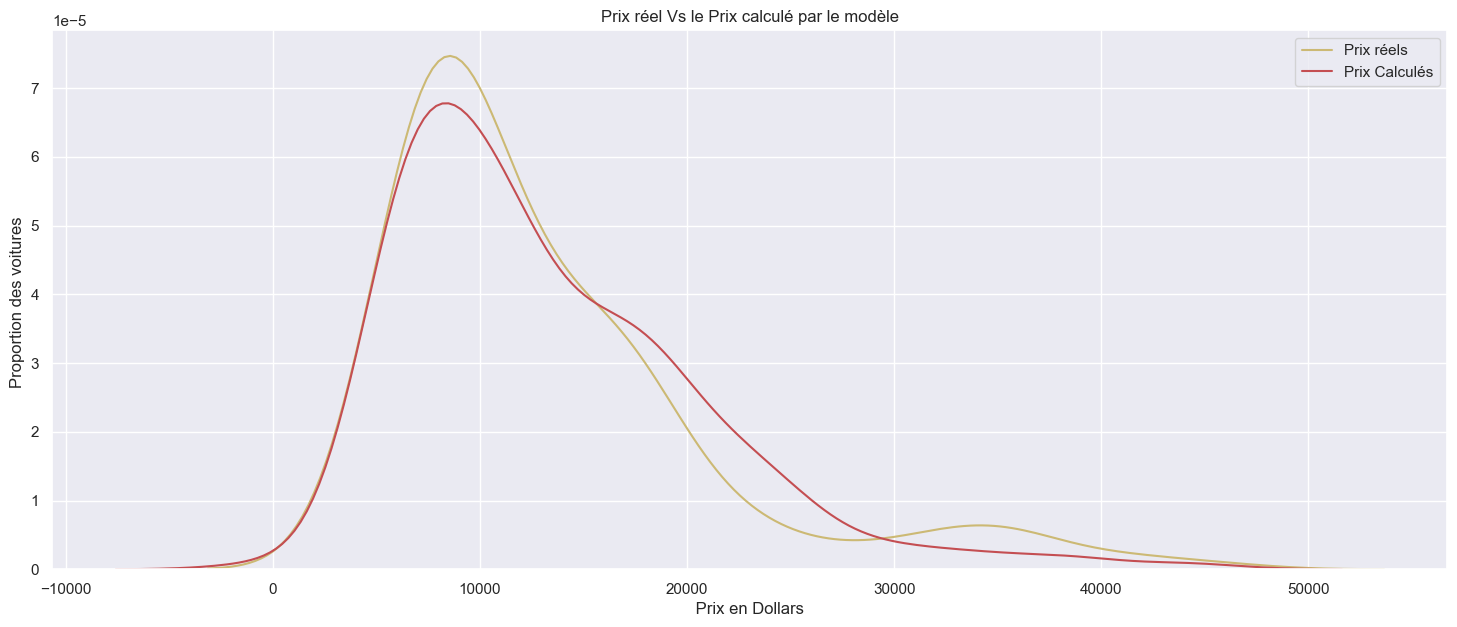

In [564]:
# Distribution de valeurs ajustées et des valeurs réelles 

plt.figure(figsize=(18, 7))

ax1 = sns.distplot(y, hist = False, color="y", label = "Prix réels")

ax2 = sns.distplot(Y_hat, hist = False, color="r", label = "Prix Calculés")

plt.xlabel(" Prix en Dollars ")
plt.ylabel("Proportion des voitures ")
plt.title("Prix réel Vs le Prix calculé par le modèle")

plt.legend()
plt.show

La métrique d'évaluation par défaut de la performance d'un modèle de régression linéaire est le coefficient de détermination. Le coefficient de détermination est égal à 0,82 c'est-à-dire que 82% de la variation de prix est expliquée par le modèle. Par ailleurs, on remarque que les deux courbes sont pratiquement superposées ce qui veut dire que les prix calculés par le modèle sont proches des prix réels. Globalement, nous pouvons donc dire que le modèle est de bonne qualité.
Néanmoins, selon le graphique ci-dessus il y a une zone que le modèle ne couvre pas ce qui indique que nous pouvons essayer d'améliorer ce modele.

#### CONCLUSION

Ce projet est une initiation à la Régression qui est une tâche de Machine Learning supervisé.
Dans le but de déterminer à quel prix 'juste' on peut vendre ou acheter une voiture, nous avons effectué la présente étude. D'abord, nous avons collecté des données pertinentes et procéder à leur nettoyage. Ensuite, ce fussent les phases de Nettoyage puis d'Analyse Exploratoire des données. Au cours de cette dernière phase, nous avons pu déterminer les variables qui influencent vraiment la valeur d'une voiture c'est-à-dire son prix. Enfin, nous avons construit

un modèle de régression linéaire puis terminé par l'évaluation de ce modèle. Le modèle a domé un bon résultat sur les données ayant servi à son entraînement. Mais le fait d'évaluer un modèle seulement sur les données d'entraînement ne nous dit pas s'il est capable de bien se comporter avec des nouvelles données. Or le but ultime de la création d'un modèle est de pouvoir l'utiliser pour effectuer des prédictions avec de nouvelles données. Un modèle peut avoir un très bon score d'entraînement et avoir une mauvaise performance sur de nouvelles données : problème de surapprentissage (overfiting). Dans les projets suivants, nous verrons plusieurs techniques permettant de vérifier la capacité d'un modèle de Machine Learning à se généraliser et aussi des techniques d'amélioration de sa qualité.